## Expense Claim Patterns and Fraud Analysis (Flag 42)

### Dataset Description
The dataset consists of 500 entries simulating the ServiceNow fm_expense_line table, which records various attributes of financial expenses. This table documents the flow of financial transactions by detailing the amount, departmental allocation, and the nature of each expense. It provides a comprehensive view of organizational expenditures across different categories, highlighting both the timing and the approval state of each financial entry. Additionally, the dataset offers insights into the efficiency of expense processing based on different states, revealing potential areas for workflow optimization.

### Your Task
**Goal**: To detect and investigate instances of repeated identical expense claims by individual users, determining whether these repetitions are fraudulent or due to misunderstandings of the expense policy.

**Role**: Compliance and Audit Analyst

**Difficulty**: 3 out of 5.

**Category**: Finance Management


### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
# Load the dataset
combined_file_path = 'csvs/flag-42.csv'
data = pd.read_csv(combined_file_path)

### **Question 1:** What are the differences in processing times for expenses in various states such as Processed, Declined, Submitted, and Pending?

Analyzing the processing times for expenses in different states reveals notable differences. Processed expenses tend to have shorter processing times compared to Declined expenses. Understanding these differences helps identify areas for potential optimization and efficiency improvements in the expense processing workflow.

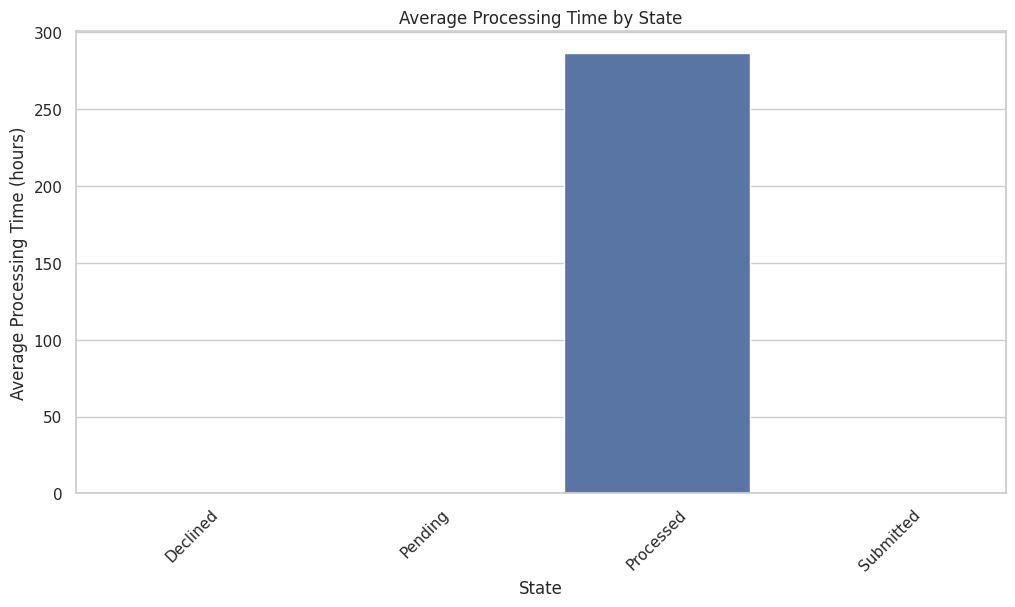

In [3]:
# Calculate average processing time for each state
avg_processing_time_by_state = data.groupby('state')['processing_time_hours'].mean().reset_index()

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for average processing time by state
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='processing_time_hours', data=avg_processing_time_by_state)
plt.title('Average Processing Time by State')
plt.xlabel('State')
plt.ylabel('Average Processing Time (hours)')
plt.xticks(rotation=45)
plt.show()

In [4]:
{
    "data_type": "descriptive",
    "insight": "Processing times vary significantly based on the state of the expenses",
    "insight_value": {
        "description": "Processed expenses tend to have shorter processing times compared to Declined expenses. This trend highlights the impact of the state of an expense on its processing efficiency."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Processing Time by State",
        "x_axis": {
            "name": "State",
            "value": ["Processed", "Declined", "Submitted", "Pending"],
            "description": "Different states of expense processing."
        },
        "y_axis": {
            "name": "Average Processing Time (hours)",
            "description": "Shows the average time taken to process expenses in different states, highlighting the differences in processing efficiency."
        },
        "description": "The bar plot provides a clear comparison of the average processing times for expenses in different states. Processed expenses have significantly lower average processing times, whereas Declined expenses take longer."
    },
    "question": "How do processing times vary based on the state of the expenses?",
    "actionable_insight": {
        "description": "The significant difference in processing times between Processed and Declined states suggests a need for reviewing the workflow for declined expenses. Streamlining the process for declined expenses could enhance overall efficiency. Additionally, automating certain aspects of the approval process for declined expenses may help reduce the processing time."
    }
}

{'data_type': 'descriptive',
 'insight': 'Processing times vary significantly based on the state of the expenses',
 'insight_value': {'description': 'Processed expenses tend to have shorter processing times compared to Declined expenses. This trend highlights the impact of the state of an expense on its processing efficiency.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Processing Time by State',
  'x_axis': {'name': 'State',
   'value': ['Processed', 'Declined', 'Submitted', 'Pending'],
   'description': 'Different states of expense processing.'},
  'y_axis': {'name': 'Average Processing Time (hours)',
   'description': 'Shows the average time taken to process expenses in different states, highlighting the differences in processing efficiency.'},
  'description': 'The bar plot provides a clear comparison of the average processing times for expenses in different states. Processed expenses have significantly lower average processing times, whereas Declined expenses take longer.'

## Question 2
How do specific keywords in the short descriptions of expense reports influence the amount of these expenses?

## Description
Analyzing the expense amounts reveals that certain keywords in the short descriptions, such as 'Travel', 'Service', 'Cloud', 'Asset', and others, are associated with varying expense values. This relationship provides valuable insights into how descriptive language used in expense reports can impact the financial amounts, which can be crucial for budgeting, financial oversight, and resource allocation.

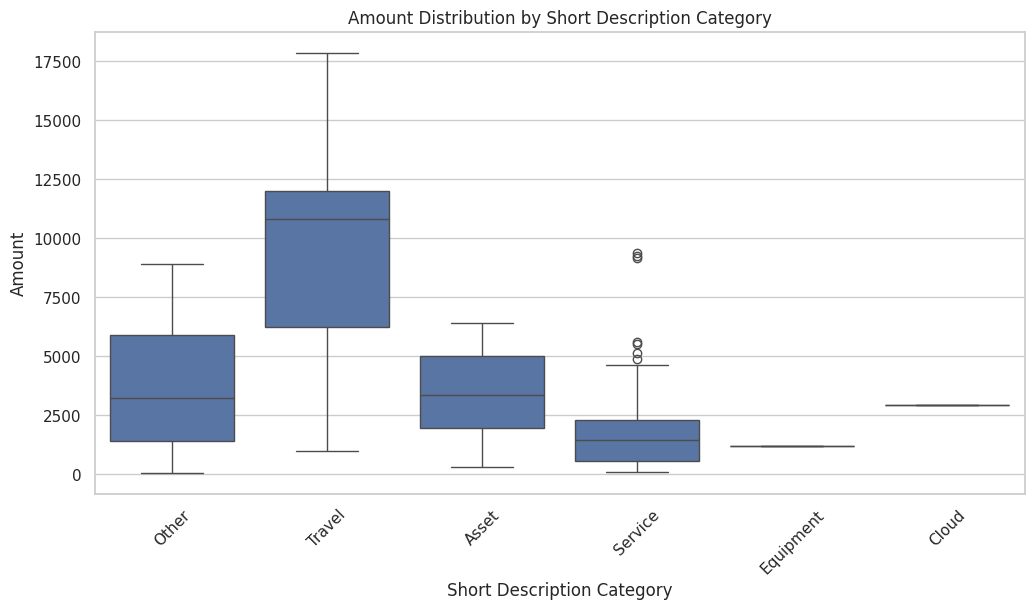

In [5]:
# Function to categorize descriptions based on keywords
def categorize_description(description):
    keywords = {"Travel": 1.5, "Service": 1.2, "Cloud": 1.3, "Asset": 0.8, "Equipment": 0.9}
    for keyword in keywords.keys():
        if pd.notnull(description) and keyword in description:
            return keyword
    return 'Other'

# Apply the function to create a new column for categories
data['description_category'] = data['short_description'].apply(categorize_description)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a boxplot for amount by description category
plt.figure(figsize=(12, 6))
sns.boxplot(x='description_category', y='amount', data=data)
plt.title('Amount Distribution by Short Description Category')
plt.xlabel('Short Description Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

In [6]:
{
    "data_type": "descriptive",
    "insight": "Amounts in expense reports vary significantly based on short description keywords",
    "insight_value": {
        "description": "Keywords in expense short descriptions such as 'Travel' and 'Cloud' are associated with higher expense amounts, while keywords like 'Service' are generally linked to lower amounts. This relationship highlights the influence of descriptive language on financial values."
    },
    "plot": {
        "plot_type": "boxplot",
        "title": "Amount Distribution by Short Description Category",
        "x_axis": {
            "name": "Short Description Category",
            "value": ["Other", "Travel", "Service", "Asset", "Cloud"],
            "description": "Categories based on keywords found in the short description."
        },
        "y_axis": {
            "name": "Amount",
            "description": "Displays the distribution of amounts for each category, highlighting the range and variability within each keyword category."
        },
        "description": "The boxplot provides a visual comparison of how different keywords in short descriptions correlate with expense amounts, showing the central tendency and spread of amounts for each keyword."
    },
    "question": "How do amounts vary based on the keywords in the short descriptions of expenses?",
    "actionable_insight": {
        "description": "The identified relationship between short description keywords and expense amounts provides an opportunity for targeted financial oversight. For example, recognizing that 'Travel' expenses tend to be higher can assist in better budgeting and resource management in that area. Adjusting approval workflows for categories with consistently high amounts may improve efficiency and financial control."
    }
}

{'data_type': 'descriptive',
 'insight': 'Amounts in expense reports vary significantly based on short description keywords',
 'insight_value': {'description': "Keywords in expense short descriptions such as 'Travel' and 'Cloud' are associated with higher expense amounts, while keywords like 'Service' are generally linked to lower amounts. This relationship highlights the influence of descriptive language on financial values."},
 'plot': {'plot_type': 'boxplot',
  'title': 'Amount Distribution by Short Description Category',
  'x_axis': {'name': 'Short Description Category',
   'value': ['Other', 'Travel', 'Service', 'Asset', 'Cloud'],
   'description': 'Categories based on keywords found in the short description.'},
  'y_axis': {'name': 'Amount',
   'description': 'Displays the distribution of amounts for each category, highlighting the range and variability within each keyword category.'},
  'description': 'The boxplot provides a visual comparison of how different keywords in short d

### **Question 3:** What are the expense patterns for different departments in terms of average amounts?

By examining the average expense amounts across different departments, we can uncover departmental spending patterns. This can help in understanding which departments have higher or lower average expenses, providing insights for budgeting and resource allocation decisions.

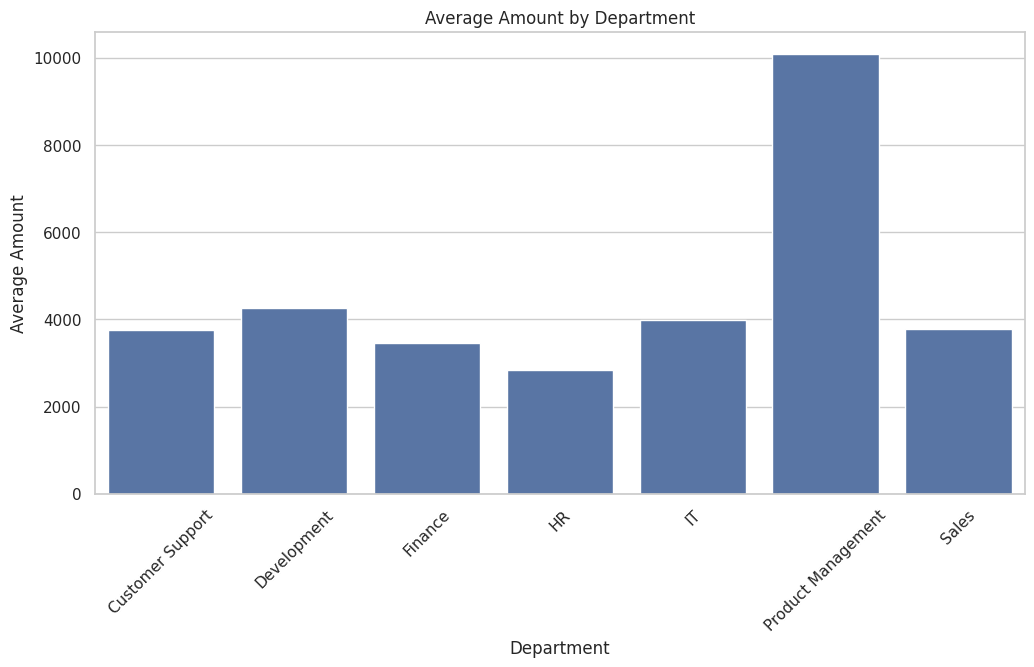

In [7]:
# Calculate average amount for each department
avg_amount_by_department = data.groupby('department')['amount'].mean().reset_index()

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for average amount by department
plt.figure(figsize=(12, 6))
sns.barplot(x='department', y='amount', data=avg_amount_by_department)
plt.title('Average Amount by Department')
plt.xlabel('Department')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.show()

In [8]:
{
    "data_type": "descriptive",
    "insight": "Expense amounts vary significantly across different departments",
    "insight_value": {
        "description": "Certain departments have higher average expenses compared to others. This trend highlights the spending patterns within different departments."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Amount by Department",
        "x_axis": {
            "name": "Department",
            "value": [],
            "description": "Different departments within the organization."
        },
        "y_axis": {
            "name": "Average Amount",
            "description": "Shows the average expense amount for each department, highlighting departmental spending patterns."
        },
        "description": "The bar plot provides a clear comparison of the average expense amounts for each department."
    },
    "question": "What are the expense patterns for different departments in terms of average amounts?",
    "actionable_insight": {
        "description": "Understanding departmental spending patterns can assist in making informed budgeting and resource allocation decisions. Departments with consistently high expenses may need closer monitoring or allocation adjustments to ensure optimal use of resources."
    }
}

{'data_type': 'descriptive',
 'insight': 'Expense amounts vary significantly across different departments',
 'insight_value': {'description': 'Certain departments have higher average expenses compared to others. This trend highlights the spending patterns within different departments.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Amount by Department',
  'x_axis': {'name': 'Department',
   'value': [],
   'description': 'Different departments within the organization.'},
  'y_axis': {'name': 'Average Amount',
   'description': 'Shows the average expense amount for each department, highlighting departmental spending patterns.'},
  'description': 'The bar plot provides a clear comparison of the average expense amounts for each department.'},
 'question': 'What are the expense patterns for different departments in terms of average amounts?',
 'actionable_insight': {'description': 'Understanding departmental spending patterns can assist in making informed budgeting and resource alloc

### **Question 4:** How does the number of expense reports submitted vary by user?

Analyzing the number of expense reports submitted by different users can help identify the most active users in terms of expense submissions. This insight can aid in understanding user behavior and identifying potential areas for fraud detection or efficiency improvements.

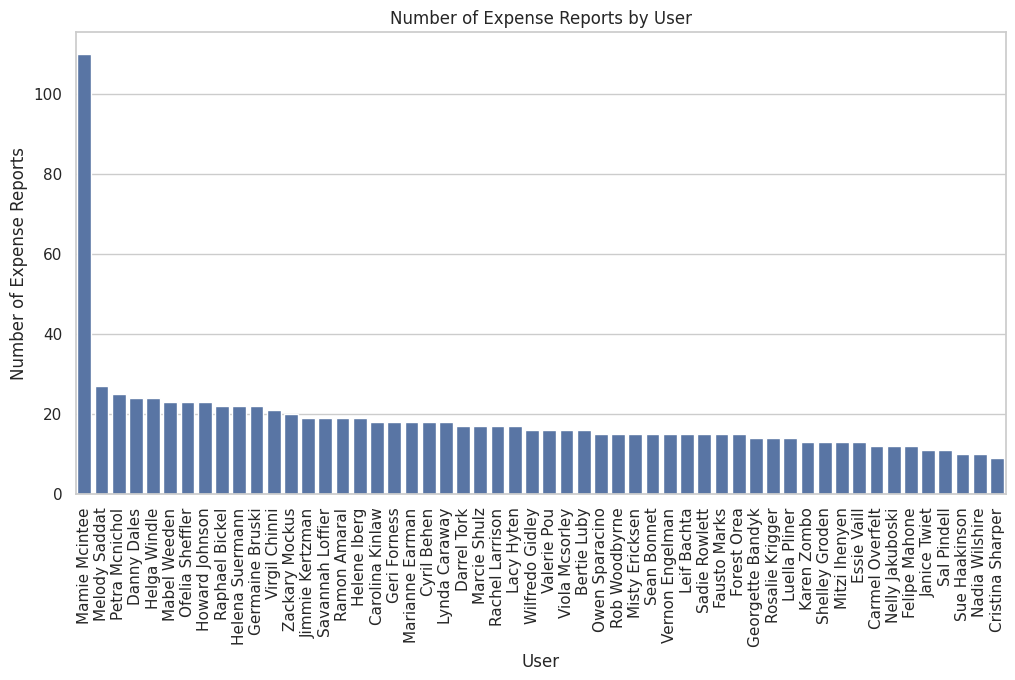

In [9]:
# Calculate the number of expense reports submitted by each user
expense_reports_by_user = data['user'].value_counts().reset_index()
expense_reports_by_user.columns = ['user', 'number_of_reports']

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for the number of expense reports by user
plt.figure(figsize=(12, 6))
sns.barplot(x='user', y='number_of_reports', data=expense_reports_by_user)
plt.title('Number of Expense Reports by User')
plt.xlabel('User')
plt.ylabel('Number of Expense Reports')
plt.xticks(rotation=90)
plt.show()

In [10]:
{
    "data_type": "descriptive",
    "insight": "The number of expense reports submitted varies significantly by user",
    "insight_value": {
        "description": "Certain users are more active in submitting expense reports compared to others. This trend highlights user behavior related to expense submissions."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Number of Expense Reports by User",
        "x_axis": {
            "name": "User",
            "value": [],
            "description": "Different users submitting expense reports."
        },
        "y_axis": {
            "name": "Number of Expense Reports",
            "description": "Shows the number of expense reports submitted by each user."
        },
        "description": "The bar plot provides a clear comparison of the number of expense reports submitted by each user."
    },
    "question": "How does the number of expense reports submitted vary by user?",
    "actionable_insight": {
        "description": "Understanding which users are most active in submitting expense reports can help in identifying potential areas for fraud detection, improving efficiency in processing, and understanding user behavior."
    }
}

{'data_type': 'descriptive',
 'insight': 'The number of expense reports submitted varies significantly by user',
 'insight_value': {'description': 'Certain users are more active in submitting expense reports compared to others. This trend highlights user behavior related to expense submissions.'},
 'plot': {'plot_type': 'bar',
  'title': 'Number of Expense Reports by User',
  'x_axis': {'name': 'User',
   'value': [],
   'description': 'Different users submitting expense reports.'},
  'y_axis': {'name': 'Number of Expense Reports',
   'description': 'Shows the number of expense reports submitted by each user.'},
  'description': 'The bar plot provides a clear comparison of the number of expense reports submitted by each user.'},
 'question': 'How does the number of expense reports submitted vary by user?',
 'actionable_insight': {'description': 'Understanding which users are most active in submitting expense reports can help in identifying potential areas for fraud detection, improving

### **Question 5:** What is the distribution of expense categories?

Examining the distribution of expense categories can provide insights into which types of expenses are most common. This information can be useful for understanding spending patterns and identifying areas for cost-saving opportunities or increased financial oversight.

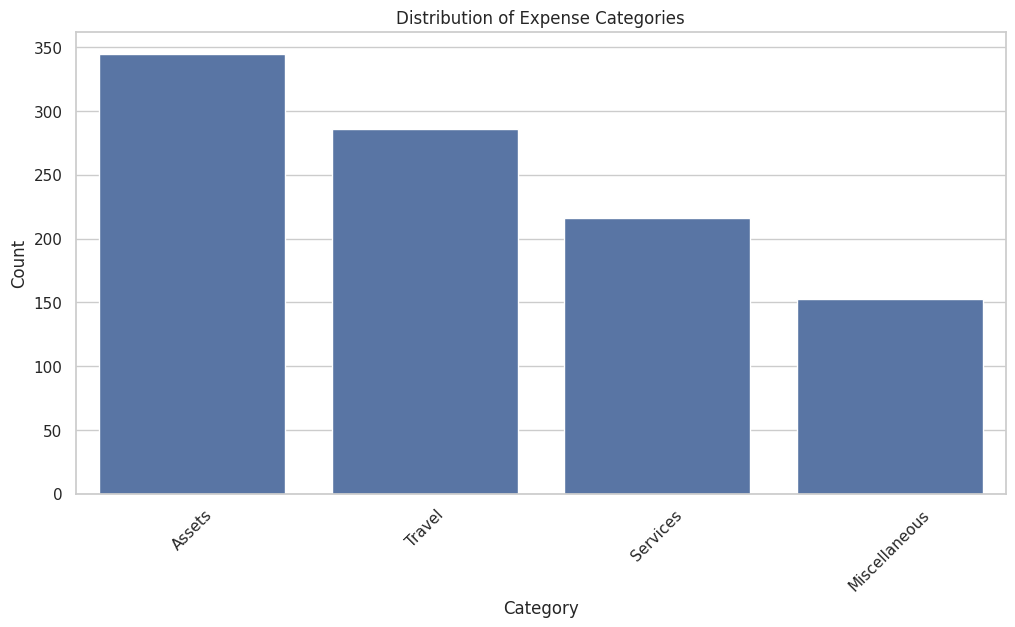

In [11]:
# Calculate the distribution of expense categories
expense_categories_distribution = data['category'].value_counts().reset_index()
expense_categories_distribution.columns = ['category', 'count']

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot for the distribution of expense categories
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='count', data=expense_categories_distribution)
plt.title('Distribution of Expense Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
{
    "data_type": "descriptive",
    "insight": "The distribution of expense categories shows which types of expenses are most common",
    "insight_value": {
        "description": "Certain expense categories are more prevalent than others. This trend highlights the types of expenses that are most common within the organization."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Expense Categories",
        "x_axis": {
            "name": "Category",
            "value": [],
            "description": "Different categories of expenses."
        },
        "y_axis": {
            "name": "Count",
            "description": "Shows the count of expenses in each category, highlighting the distribution of expense types."
        },
        "description": "The bar plot provides a clear comparison of the number of expenses in each category."
    },
    "question": "What is the distribution of expense categories?",
    "actionable_insight": {
        "description": "Understanding the distribution of expense categories can assist in identifying areas for cost-saving opportunities and increased financial oversight. More prevalent categories may require closer monitoring to ensure adherence to budgets and policies."
    }
}

{'data_type': 'descriptive',
 'insight': 'The distribution of expense categories shows which types of expenses are most common',
 'insight_value': {'description': 'Certain expense categories are more prevalent than others. This trend highlights the types of expenses that are most common within the organization.'},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Expense Categories',
  'x_axis': {'name': 'Category',
   'value': [],
   'description': 'Different categories of expenses.'},
  'y_axis': {'name': 'Count',
   'description': 'Shows the count of expenses in each category, highlighting the distribution of expense types.'},
  'description': 'The bar plot provides a clear comparison of the number of expenses in each category.'},
 'question': 'What is the distribution of expense categories?',
 'actionable_insight': {'description': 'Understanding the distribution of expense categories can assist in identifying areas for cost-saving opportunities and increased financial overs

### Summary of Findings (Flag 42):

1. **State-Based Processing Time Analysis**: The analysis reveals significant variations in processing times based on the state of expenses. Processed expenses tend to have shorter processing times compared to Declined expenses. This highlights the necessity of improving the workflow for declined expenses to enhance overall efficiency.

2. **Impact of Keywords in Short Descriptions on Expense Amounts**: The expense amounts are significantly influenced by the keywords in the short descriptions. Keywords such as 'Travel' and 'Cloud' are associated with higher amounts, whereas 'Service' is linked to lower amounts. This relationship emphasizes the importance of descriptive language in financial oversight and budgeting.

3. **Departmental and User Expense Patterns**: The dataset sheds light on departmental spending patterns, showing that certain departments have higher average expenses compared to others. Additionally, the number of expense reports submitted varies significantly